# Visualization 1 - States with more guns see more deaths by guns

In [2]:
import pandas as pd 
import numpy as np

In [142]:
# Read Firearm homicide data from CDC website
homi_state=pd.read_csv('data/FirearmHomicideByState-99-2017.csv')
# Read Firearm suicide data from CDC website
suicide_state=pd.read_csv('data/FirearmSuicideByState-99-2017.csv')

# merge the two datasets by State and Year
deaths_state=pd.merge(homi_state,suicide_state,on=["State","Year"],how='left')
# Fill nas with zeros
deaths_state=deaths_state.fillna(0)
# convert SuicideDeaths to integer to avoid display 127.0
deaths_state['SuicideDeaths']=deaths_state['SuicideDeaths'].values.astype(np.int)
# Calculate Deaths_Rate Per 100K=(TotalDeaths/TotalPopulation)*100000 and round to 1 decimal place
deaths_state['Deaths_Rate']=round(((deaths_state.HomicideDeaths+deaths_state.SuicideDeaths)/(deaths_state.TotalPopulation))*100000,1)

# state abbreviation
stateabbr=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Abbr.csv')
# drop extra columns(not needed)
stateabbr=stateabbr.drop(["Unnamed: 2"],axis=1)
stateabbr=stateabbr.drop(["Unnamed: 3"],axis=1)
# rename abbr to StateCode
stateabbr=stateabbr.rename(columns={"state":"State","abbr":"StateCode"})
# merge deaths by state with state abbreviation dataset
deaths_state=pd.merge(deaths_state,stateabbr,on="State",how="inner")

# gun ownership processing
# read from licensed_ownership_bystate.csv
df=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/licensed_ownership_bystate.csv')
df.reset_index(inplace=True)
# select State,Year and Total Weapons only
final_dff=df[["State","Year","Total"]]
final_dff=final_dff.drop_duplicates()
# rename Total to Total_Firearms
final_dff=final_dff.rename(columns={"Total":"Total_Firearms"})
# merge deaths_state with final_dff (total firearms by state,year)
deaths_state=pd.merge(deaths_state,final_dff,on=["State","Year"],how="inner")
# calculate Guns_Per1000 as TotalFirearms/AdultPopulation times 1000
deaths_state['Guns_Per1000']=round((deaths_state['Total_Firearms']/deaths_state['TotalPopulation'])*1000)
deaths_state[deaths_state.Year==2016].sample(10)
deaths_state = deaths_state.sort_values(by=['Guns_Per1000','Deaths_Rate'], ascending=False)
#deaths_state['TotalDeaths']=deaths_state.HomicideDeaths+deaths_state.SuicideDeaths
deaths_state[deaths_state.Year==2016][['State','Guns_Per1000','Deaths_Rate']]
newdf=deaths_state[deaths_state.Year==2016]
max_value = newdf["Guns_Per1000"].max()
min_value = newdf["Guns_Per1000"].min()
newdf["normalized_gper1000"] = (newdf["Guns_Per1000"] - min_value) / (max_value - min_value)
newdf=newdf.sort_values(by=['normalized_gper1000','Deaths_Rate'], ascending=False)[['State','StateCode','Guns_Per1000','Deaths_Rate']]


law_state=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/lawsstate.csv')
newdf.head(10)

/Users/srinivasanvasudevan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,State,StateCode,Guns_Per1000,Deaths_Rate
278,Wyoming,WY,227.0,16.8
257,Virginia,VA,37.0,12.2
5,Alabama,AL,33.0,20.7
82,Idaho,ID,30.0,13.7
26,Arkansas,AR,27.0,17.2
194,Nevada,NV,26.0,16.4
19,Arizona,AZ,26.0,15.3
124,Louisiana,LA,25.0,20.6
243,Utah,UT,24.0,11.7
47,Connecticut,CT,23.0,4.6


In [132]:
def show_laws(year):
   x = law_state[law_state['year'] == year].reset_index(drop = True)
   x = x.sort_values(by = 'lawtotal', ascending = False)
   return x


In [144]:
law_state_n = show_laws(2016)
law_state_n=law_state_n.rename(columns={"state":"State"})

In [145]:
law_state_n = law_state_n.iloc[:,[0,-1]]

In [146]:
# sort values by state & show head
law_state_n = law_state_n.sort_values(by=['State'])
law_state_n.head(2)
newdf=pd.merge(newdf,law_state_n,on=["State"],how="inner")
newdf.sample(10)

,State,StateCode,Guns_Per1000,Deaths_Rate,lawtotal
16,Kansas,KS,18.0,12.7,4
31,Illinois,IL,11.0,11.3,65
1,Virginia,VA,37.0,12.2,13
0,Wyoming,WY,227.0,16.8,6
36,Michigan,MI,7.0,12.1,21
19,Colorado,CO,17.0,14.0,30
10,Alaska,AK,21.0,21.3,3
7,Louisiana,LA,25.0,20.6,12
2,Alabama,AL,33.0,20.7,10
38,Delaware,DE,5.0,11.4,39


Text(0.5, 1.0, 'Gun Laws Per State vs. Gun Ownership(Per Capita) for the Year 2016')

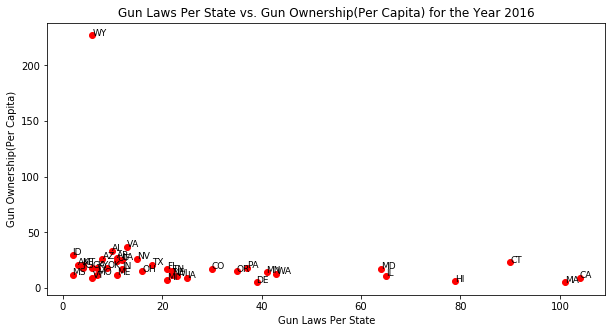

In [147]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

#max_value = newdf["Guns_Per1000"].max()
#min_value = newdf["Guns_Per1000"].min()
#newdf["normalized_gper1000"] = (newdf["Guns_Per1000"] - min_value) / (max_value - min_value)

# Wyoming is an outlier with Guns_Per1000 as 298 and the rest of the states
# have Guns_Per1000 < 60. Need to discuss on this. For now filtering this outlier...
#newdf = newdf[newdf.State!='Wyoming']

X = newdf.lawtotal.values
Y = newdf.Guns_Per1000.values
n = newdf.StateCode.values


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.xlabel('Gun Laws Per State')
plt.ylabel('Gun Ownership(Per Capita)')
plt.title('Gun Laws Per State vs. Gun Ownership(Per Capita) for the Year 2016')

Text(0.5, 1.0, 'Gun Ownership vs. Gun Deaths State Wise for the Year 2016')

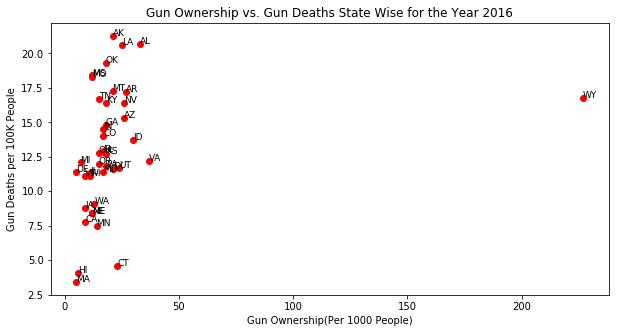

In [148]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
newdf = deaths_state[deaths_state.Year==2016]

#max_value = newdf["Guns_Per1000"].max()
#min_value = newdf["Guns_Per1000"].min()
#newdf["normalized_gper1000"] = (newdf["Guns_Per1000"] - min_value) / (max_value - min_value)

# Wyoming is an outlier with Guns_Per1000 as 298 and the rest of the states
# have Guns_Per1000 < 60. Need to discuss on this. For now filtering this outlier...
#newdf = newdf[newdf.State!='Wyoming']

Y = newdf.Deaths_Rate.values
X = newdf.Guns_Per1000.values
n = newdf.StateCode.values


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.xlabel('Gun Ownership(Per 1000 People)')
plt.ylabel('Gun Deaths per 100K People')
plt.title('Gun Ownership vs. Gun Deaths State Wise for the Year 2016')

# Visualization 2

In [2]:
# Read data from fire arm laws by state
df=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/lawsstate.csv')
#http://www.statefirearmlaws.org/national-data/2016

In [3]:
# for Year 2016
def show_laws(year):
   x = df[df['year'] == year].reset_index(drop = True)
   x = x.sort_values(by = 'lawtotal', ascending = False)
   return x


In [4]:
# Type in the year for data you want
df1 = show_laws(2016)

In [5]:
# only need the last column with total laws
df2 = df1.iloc[:,[0,-1]]

In [6]:
# sort values by state & show head
df3 = df2.sort_values(by=['state'])
df3.head(2)

,state,lawtotal
0,Alabama,10
1,Alaska,3


### 2nd file - Gun death per 100K residents by state for 2016

In [7]:
# Read data
Gunrate=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/yr2016firearmdeathrate.csv')
#https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [8]:
# drop unwanted rows
Gunrate = Gunrate.loc[1:51:]

In [9]:
# Rename the column
cols=['state','rate']
Gunrate.columns=cols
Gunrate.head(3)

,state,rate
1,Alabama,21.5
2,Alaska,23.3
3,Arizona,15.2


In [10]:
# reset index and drop unwanted column
Gunrate.reset_index(inplace=True)
Gunrate.drop(['index'],axis=1,inplace=True)

In [11]:
Gunrate.sort_values(by=['state'])
Gunrate.head(3)

,state,rate
0,Alabama,21.5
1,Alaska,23.3
2,Arizona,15.2


### Get State abbreviations

In [12]:
# Read state abbreviations from excel file
stateabbr=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Abbr.csv')

In [13]:
stateabbr.sort_values(by=['state'])
stateabbr.head(2)

,state,abbr,Unnamed: 2,Unnamed: 3
0,Alabama,AL,NaN,NaN
1,Alaska,AK,NaN,NaN


### concat data frames into one

In [14]:
# Concat all the dataframes into one
total=pd.concat([df3,Gunrate])

C:\Users\MarvinHP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [15]:
#group by state 
statelaw_rate = total.groupby('state')['lawtotal','rate',].max()

In [16]:
# get rid of NA
statelaw_rate['rate'] = statelaw_rate.rate.fillna(0)

In [17]:
# get rid of NA
statelaw_rate['lawtotal'] = statelaw_rate.lawtotal.fillna(0)

In [18]:
# reset index
statelaw_rate.reset_index(inplace=True)

In [19]:
# sort by state
statelaw_rate.sort_values(by=['state']).head(2)

,state,lawtotal,rate
0,Alabama,10.0,21.5
1,Alaska,3.0,23.3


### create graph

In [20]:
# list of state abbreviations 
my_list = stateabbr.abbr.values

In [21]:
x = statelaw_rate.lawtotal

In [22]:
y = statelaw_rate.rate

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

Text(0.5, 1.0, 'Gun Laws vs. Gun Deaths')

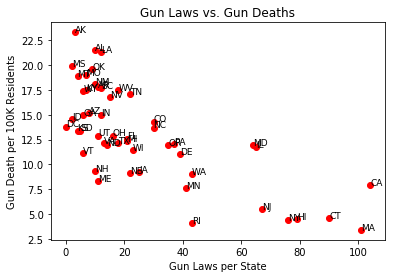

In [24]:
# MY GRAPH NEEDS X AXIS LAWS Y AXIS GUN DEATHS
Y = y
X = x
n = my_list


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.xlabel('Gun Laws per State')
plt.ylabel('Gun Death per 100K Residents')
plt.title('Gun Laws vs. Gun Deaths')
